<a href="https://colab.research.google.com/github/ckdlsqpf/projectmanager/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('GOOG.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-03-28,558.46,559.66,564.88,557.14,41.12K,0.0027
1,2014-03-31,555.45,565.34,565.45,555.41,10.80K,-0.0054
2,2014-04-01,565.61,557.18,566.89,557.18,7.95K,0.0183
3,2014-04-02,565.45,598.35,603.17,560.65,147.10K,-0.0003
4,2014-04-03,568.18,568.29,585.67,562.59,5.10M,0.0048


In [2]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

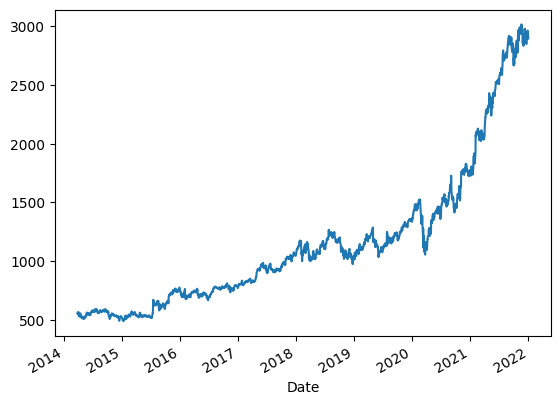

In [8]:
df.Price.plot()

In [9]:
df.Price.diff()

Date
2014-03-28      NaN
2014-03-31    -3.01
2014-04-01    10.16
2014-04-02    -0.16
2014-04-03     2.73
              ...  
2021-12-27    18.43
2021-12-28   -32.32
2021-12-29     1.13
2021-12-30   -10.04
2021-12-31   -26.46
Name: Price, Length: 1957, dtype: float64

<Axes: xlabel='Date'>

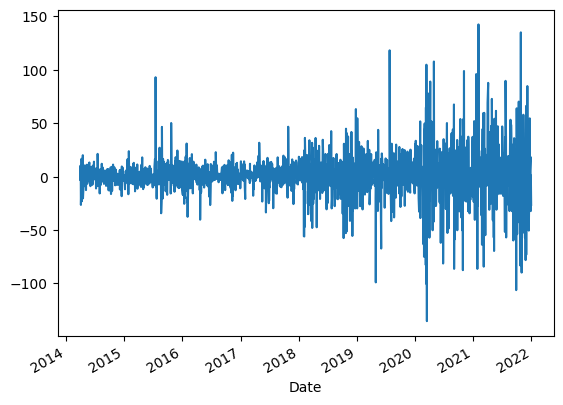

In [10]:
df.Price.diff().plot()

In [11]:
df.Price.pct_change()

Date
2014-03-28         NaN
2014-03-31   -0.005390
2014-04-01    0.018291
2014-04-02   -0.000283
2014-04-03    0.004828
                ...   
2021-12-27    0.006263
2021-12-28   -0.010914
2021-12-29    0.000386
2021-12-30   -0.003427
2021-12-31   -0.009061
Name: Price, Length: 1957, dtype: float64

<Axes: xlabel='Date'>

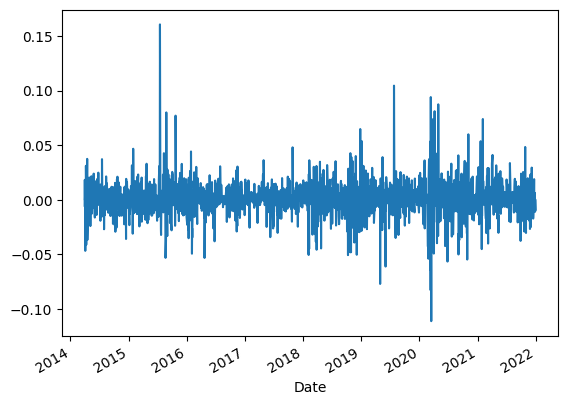

In [12]:
df.Price.pct_change().plot()

In [14]:
df.Price.asfreq('BM')   # 영업일 기준 월말

Date
2014-03-31     555.45
2014-04-30     525.22
2014-05-30     558.36
2014-06-30     573.70
2014-07-31     570.03
               ...   
2021-08-31    2909.24
2021-09-30    2665.31
2021-10-29    2965.41
2021-11-30    2849.04
2021-12-31    2893.59
Freq: BM, Name: Price, Length: 94, dtype: float64

In [20]:
df.Price.asfreq('AS')

Date
2015-01-01   NaN
2016-01-01   NaN
2017-01-01   NaN
2018-01-01   NaN
2019-01-01   NaN
2020-01-01   NaN
2021-01-01   NaN
Freq: AS-JAN, Name: Price, dtype: float64

In [18]:
df.Price.asfreq('AS', method='bfill')

Date
2015-01-01     523.37
2016-01-01     741.84
2017-01-01     786.14
2018-01-01    1065.00
2019-01-01    1045.85
2020-01-01    1367.37
2021-01-01    1728.24
Freq: AS-JAN, Name: Price, dtype: float64

In [21]:
df.Price['2016-01-01':'2016-01-07']

Date
2016-01-04    741.84
2016-01-05    742.58
2016-01-06    743.62
2016-01-07    726.39
Name: Price, dtype: float64

<Axes: xlabel='Date'>

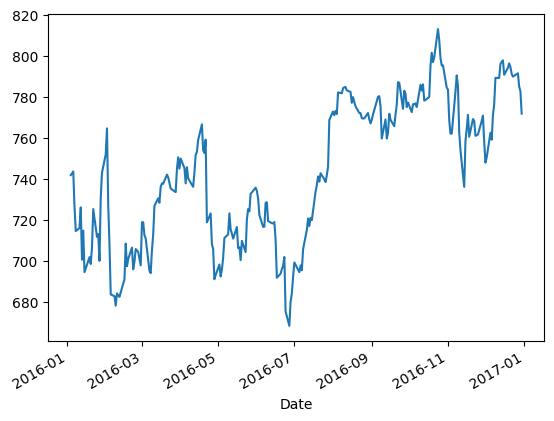

In [22]:
df.Price['2016'].plot()

<Axes: xlabel='Date'>

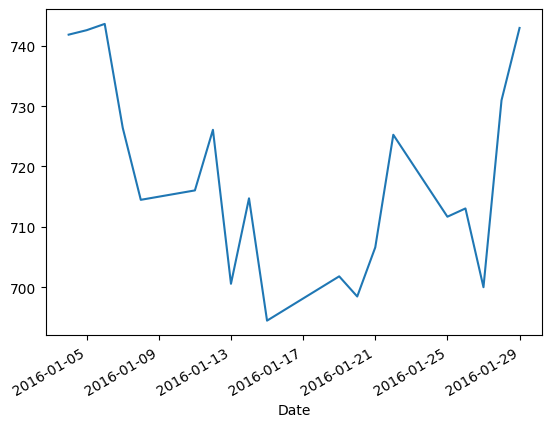

In [23]:
df.Price['2016-01'].plot()

In [26]:
df.Price.resample('AS').mean()    # 연평균 가격

Date
2014-01-01     552.645699
2015-01-01     602.005556
2016-01-01     743.330277
2017-01-01     921.781394
2018-01-01    1113.225139
2019-01-01    1188.393056
2020-01-01    1481.403794
2021-01-01    2510.613452
Freq: AS-JAN, Name: Price, dtype: float64

In [29]:
df.Price.resample('AS').sum()

Date
2014-01-01    106660.62
2015-01-01    151705.40
2016-01-01    188062.56
2017-01-01    231367.13
2018-01-01    279419.51
2019-01-01    299475.05
2020-01-01    374795.16
2021-01-01    632674.59
Freq: AS-JAN, Name: Price, dtype: float64

<Axes: xlabel='Date'>

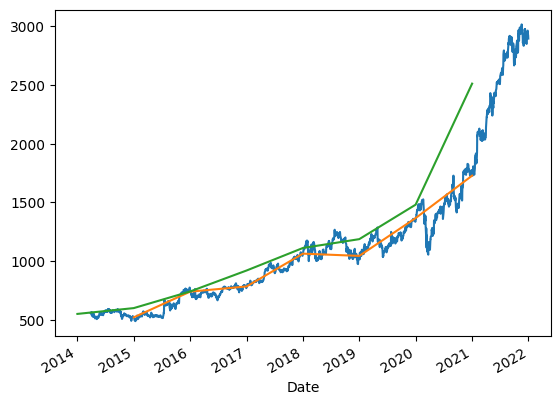

In [27]:
df.Price.plot()  # 매일 매일 가격 (파랑)
df.Price.asfreq('AS', method='bfill').plot() # 연초 가격 (주황))
df.Price.resample('AS').mean().plot()        # 연평균 가격 (초록)

- resample
 - 2014-01-01 ~ 2014-12-31
 - 2015-01-01 ~ 2015-12-31

- rolling (이동평균)
 - 2014-01-01 ~ 2014-12-31
 - 2014-01-02 ~ 2015-01-01
 - 2014-01-03 ~ 2015-01-02

In [44]:
df.Price.rolling(365, center=True).mean() # 앞뒤로 180일이 비어있음

Date
2014-03-28   NaN
2014-03-31   NaN
2014-04-01   NaN
2014-04-02   NaN
2014-04-03   NaN
              ..
2021-12-27   NaN
2021-12-28   NaN
2021-12-29   NaN
2021-12-30   NaN
2021-12-31   NaN
Name: Price, Length: 1957, dtype: float64

<Axes: xlabel='Date'>

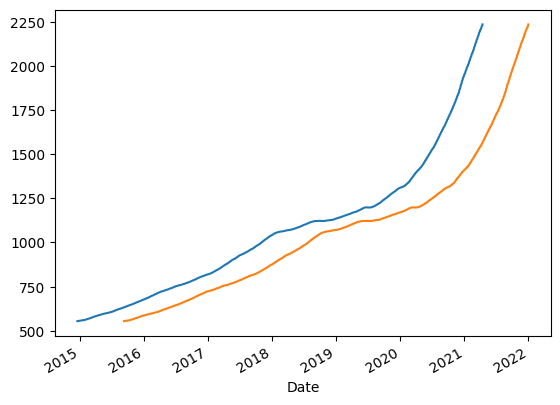

In [39]:
df.Price.rolling(365, center=True).mean().plot() # 가운데 날짜에 이동평균 표시 (파랑), 추세 보기 쉽게 하기 위함
df.Price.rolling(365).mean().plot() # 마지막 날짜에 이동평균 표시 (주황)

In [46]:
data = pd.read_csv('bicycle.csv', index_col = 'Date', parse_dates=True) # 자동으로 날짜처리
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [49]:
data.columns = ['Total', 'East', 'West']
data.head(3)

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0


<Axes: xlabel='Date'>

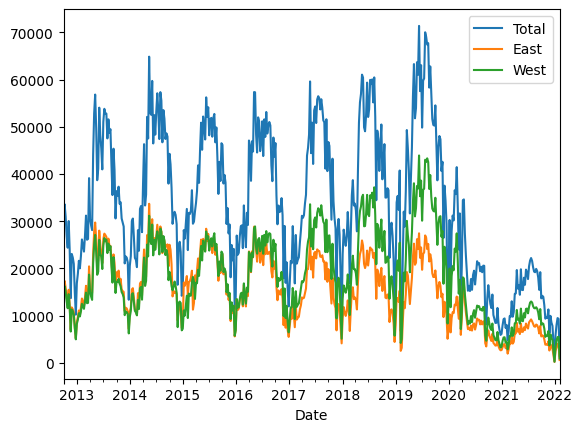

In [51]:
data.resample('W').sum().plot()   # 주단위 합계

<Axes: xlabel='Date'>

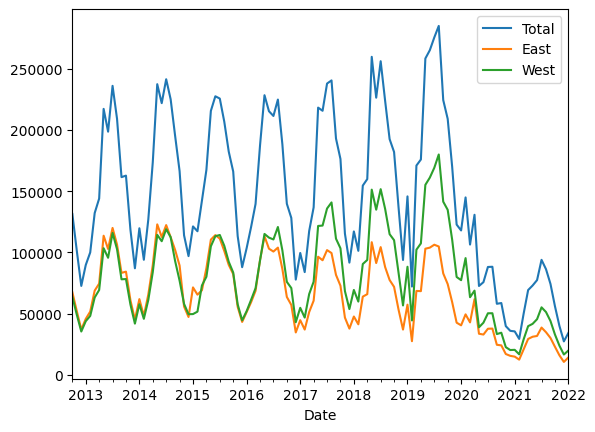

In [52]:
data.resample('M').sum().plot()  # 월단위 합계

In [54]:
data.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date', length=148022)

<Axes: xlabel='time'>

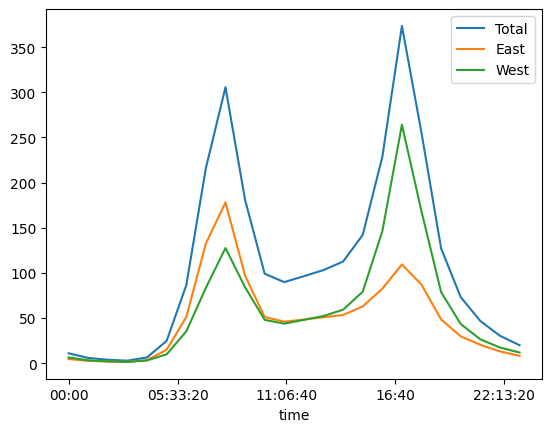

In [55]:
# 시간대별 평균
by_time= data.groupby(data.index.time).mean()
by_time.plot()

<Axes: xlabel='Date'>

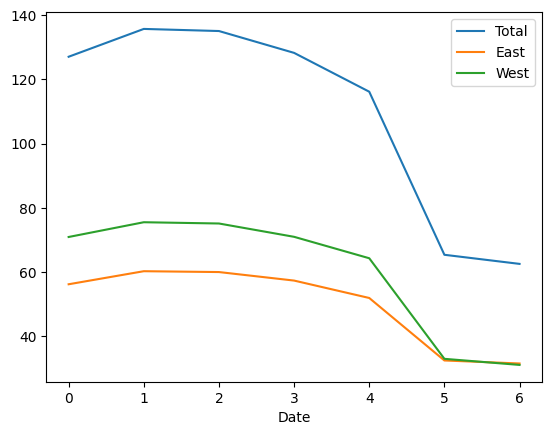

In [56]:
# 요일별 평균
by_time= data.groupby(data.index.dayofweek).mean()  # 0이 월요일
by_time.plot()

In [63]:
import numpy as np
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    9.076469    3.859995    5.216474
        01:00:00    4.505786    2.009076    2.496710
        02:00:00    2.997050    1.465396    1.531654
        03:00:00    2.580894    1.323576    1.257318
        04:00:00    7.426367    4.022237    3.404902
        05:00:00   31.766281   19.372589   12.393692
        06:00:00  114.026776   68.398003   45.628772
        07:00:00  289.448151  178.975494  110.472657
        08:00:00  403.890855  236.915135  166.975720
        09:00:00  220.241998  118.598184  101.643814
        10:00:00   97.989103   50.190465   47.798638
        11:00:00   76.341884   39.047900   37.293984
        12:00:00   80.039728   39.782974   40.256754
        13:00:00   86.405037   41.968913   44.436124
        14:00:00   98.195188   44.709487   53.485701
        15:00:00  140.200635   58.478665   81.721970
        16:00:00  266.174081   88.604630  177.569451
        17:00:00  478.786882  131.352247  347.434635
        18:00:00  323.010213  104.875170  218.135043
        19:00:00  154.853836   56.565819   98.288016
        20:00:00   85.892873   33.958466   51.934408
        21:00:00   53.668180   23.104176   30.564004
        22:00:00   33.841126   14.371993   19.469133
        23:00:00   21.134589    8.582615   12.551975
Weekend 00:00:00   15.477570    6.378762    9.098807
        01:00:00    8.915389    3.949461    4.965928
        02:00:00    5.781912    2.657699    3.124213
        03:00:00    3.341283    1.654174    1.687110
        04:00:00    3.687110    1.519591    2.167518
        05:00:00    7.233390    3.806928    3.426462
        06:00:00   16.809767    7.789324    9.020443
        07:00:00   32.328223   16.407155   15.921068
        08:00:00   59.680863   30.772288   28.908575
        09:00:00   82.423055   42.398637   40.024418
        10:00:00  101.570131   53.170926   48.399205
        11:00:00  123.415673   63.421352   59.994321
        12:00:00  137.116411   69.719478   67.396934
        13:00:00  144.893810   73.128336   71.765474
        14:00:00  148.639409   75.001704   73.637706
        15:00:00  146.609881   73.856332   72.753549
        16:00:00  134.170358   67.110165   67.060193
        17:00:00  110.392391   54.566156   55.826235
        18:00:00   84.624077   41.942078   42.681999
        19:00:00   57.609881   27.897785   29.712095
        20:00:00   41.144236   19.302101   21.842135
        21:00:00   29.346962   13.404884   15.942078
        22:00:00   21.625213    9.646792   11.978421
        23:00:00   16.834185    6.931289    9.902896

<Axes: xlabel='time'>

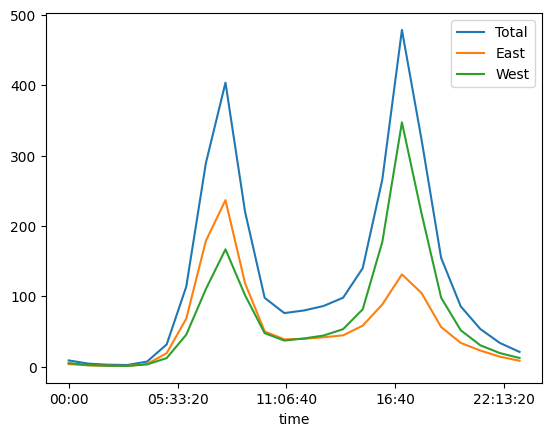

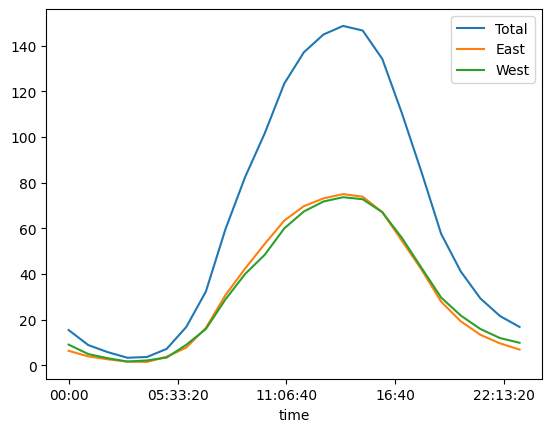

In [69]:
by_time.loc['Weekday'].plot()
by_time.loc['Weekend'].plot()